# 🎬 Étude de marché – Cinéma dans la Creuse

## Objectif
Comprendre le public local du département de la Creuse afin d’adapter
la programmation du cinéma et construire un système de recommandation pertinent.

## Contexte
Le cinéma fait face à une baisse de fréquentation.
Avant d’utiliser les données IMDb et TMDB, il est nécessaire de comprendre
les habitudes culturelles et démographiques locales.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [17]:
#ÉTAPE 1 : ANALYSE DÉMOGRAPHIQUE 
# Source des données : Insee, RP2022 exploitation principale (Département de la Creuse)

data_age = {
    'Tranche_age': ['0-14 ans', '15-29 ans', '30-44 ans', '45-59 ans', '60-74 ans', '75-89 ans', '90+'],
    'Hommes': [7599, 7501, 8511, 11791, 14076, 6105, 767], # Donnees tableau POP T3
    'Femmes': [7397, 6628, 8164, 11872, 14381, 8631, 2105]  # Donnees tableau POP T3
}


print("Source des données : INSEE - Recensement de la population 2022")

Source des données : INSEE - Recensement de la population 2022


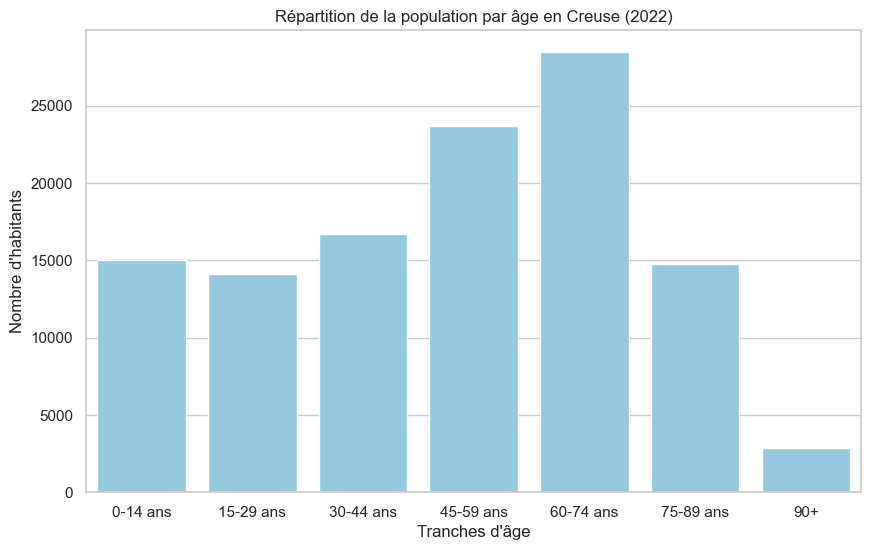

Conclusion : La population est vieillissante. Les plus de 60 ans sont les plus nombreux.


In [18]:
df_age = pd.DataFrame(data_age)

#  (Total) 
df_age['Total'] = df_age['Hommes'] + df_age['Femmes']

# 2. Création du graphique 
plt.figure(figsize=(10, 6))
sns.barplot(x='Tranche_age', y='Total', data=df_age, color='skyblue')
plt.title('Répartition de la population par âge en Creuse (2022)')
plt.xlabel('Tranches d\'âge')
plt.ylabel('Nombre d\'habitants')

plt.show()

# 3. Conclusion pour le client 
print("Conclusion : La population est vieillissante. Les plus de 60 ans sont les plus nombreux.")

In [19]:
# ÉTAPE 2 : ANALYSE DES REVENUS ET PAUVRETÉ ---
# Source des données : Insee, Fichier localisé social et fiscal (Filosofi) 2021

# 1. Création d'un petit tableau pour les revenus 
data_revenu = {
    'Indicateur': ['Revenu disponible médian', 'Taux de pauvreté global'],
    'Valeur': [20620, 19.2] # Donnees tableau REV T1 и REV G1, INSEE
}

df_rev = pd.DataFrame(data_revenu)

# 2. Affichage des résultats 
print("Résumé des revenus en Creuse :")
print(f"- Le revenu médian est de {df_rev.iloc[0]['Valeur']} € par an.")
print(f"- Le taux de pauvreté moyen est de {df_rev.iloc[1]['Valeur']} %.")

# 3. Pourquoi c'est important ? 
# Explication dans 'print'
print("\nConclusion pour le projet :")
print("Le budget des habitants est limité. Le site doit proposer des tarifs réduits,")
print("surtout pour les moins de 30 ans qui sont les plus touchés par la pauvreté (25,3%).")

Résumé des revenus en Creuse :
- Le revenu médian est de 20620.0 € par an.
- Le taux de pauvreté moyen est de 19.2 %.

Conclusion pour le projet :
Le budget des habitants est limité. Le site doit proposer des tarifs réduits,
surtout pour les moins de 30 ans qui sont les plus touchés par la pauvreté (25,3%).


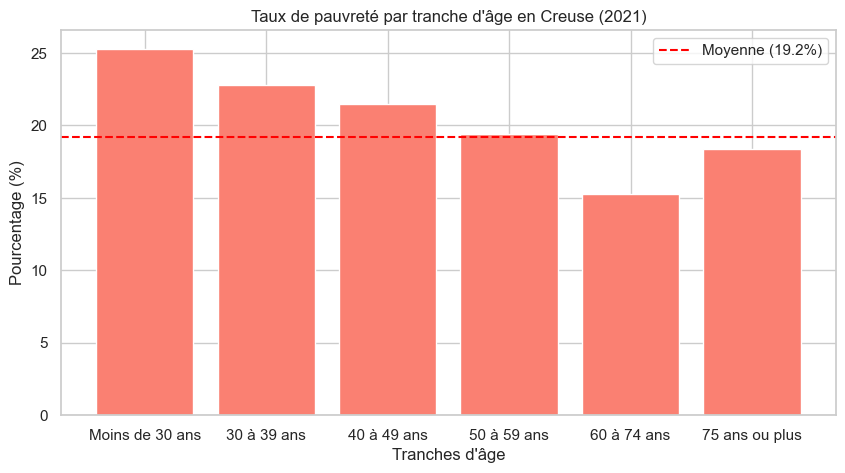

In [20]:
# ÉTAPE 2.1 : VISUALISATION DE LA PAUVRETÉ ---
# Donnees tableau REV G1, INSEE

data_pauvrete = {
    'Tranche_age': ['Moins de 30 ans', '30 à 39 ans', '40 à 49 ans', '50 à 59 ans', '60 à 74 ans', '75 ans ou plus'],
    'Taux_pourcentage': [25.3, 22.8, 21.5, 19.4, 15.3, 18.4] # Tableau REV G1
}

df_pauvrete = pd.DataFrame(data_pauvrete)


plt.figure(figsize=(10, 5))
plt.bar(df_pauvrete['Tranche_age'], df_pauvrete['Taux_pourcentage'], color='salmon')

plt.title('Taux de pauvreté par tranche d\'âge en Creuse (2021)')
plt.ylabel('Pourcentage (%)')
plt.xlabel('Tranches d\'âge')

# Добавляем горизонтальную линию среднего уровня (19.2%), чтобы было с чем сравнивать
plt.axhline(y=19.2, color='red', linestyle='--', label='Moyenne (19.2%)')
plt.legend() # Pour montre identification pour ligne rouge

plt.show()

In [21]:
#ÉTAPE 3 : ANALYSE DE LA FRÉQUENTATION (CNC) 


# 1. Liens des sources 
source_cnc_geo = "https://www.cnc.fr/professionnels/etudes-et-rapports/statistiques/geographie-du-cinema"
source_cnc_actu = "https://www.cnc.fr/professionnels/actualites/frequentation-cinematographique-en-2024"

# 2. Données clés 
print("--- ANALYSE DE LA FRÉQUENTATION ---")
# 181 millions ticket vendu en France
print(f"- Fréquence nationale 2024 : 181 millions d'entrées.")
# Пожилые люди ходят в кино 6.3 раза в год
print(f"- Les 60 ans et plus : 6,3 entrées/an (Public cible en Creuse).")
# Рост залов Art et Essai
print(f"- Croissance du public 'Art et Essai' : +2,9%.")

# 3. Affichage des liens 
print("\n--- SOURCES OFFICIELLES (LIENS) ---")
print(f"1. Géographie du cinéma : {source_cnc_geo}")
print(f"2. Bilan de fréquentation 2024 : {source_cnc_actu}")

# 4. Conclusion Stratégique 
print("\n--- STRATÉGIE POUR LE PROJET ---")
print("Nous allons filtrer la base IMDb pour trouver des films 'Art et Essai'")
print("et des classiques qui plairont aux seniors de la Creuse.")

--- ANALYSE DE LA FRÉQUENTATION ---
- Fréquence nationale 2024 : 181 millions d'entrées.
- Les 60 ans et plus : 6,3 entrées/an (Public cible en Creuse).
- Croissance du public 'Art et Essai' : +2,9%.

--- SOURCES OFFICIELLES (LIENS) ---
1. Géographie du cinéma : https://www.cnc.fr/professionnels/etudes-et-rapports/statistiques/geographie-du-cinema
2. Bilan de fréquentation 2024 : https://www.cnc.fr/professionnels/actualites/frequentation-cinematographique-en-2024

--- STRATÉGIE POUR LE PROJET ---
Nous allons filtrer la base IMDb pour trouver des films 'Art et Essai'
et des classiques qui plairont aux seniors de la Creuse.


In [22]:
# ÉTAPE 4 : SYNTHÈSE DES IMPACTS DÉMOGRAPHIQUES ET ÉCONOMIQUES SUR LA PROGRAMMATION CINÉMA

impact_economique = pd.DataFrame({
    "Élément observé": [
        "Population majoritaire",
        "Taux de pauvreté élevé",
        "Fréquentation régulière",
        "Sensibilité au prix"
    ],
    "Constat en Creuse": [
        "60 ans et plus",
        "Plus élevé chez les seniors",
        "Cinéma = sortie culturelle accessible",
        "Prix du billet important"
    ],
    "Impact sur la programmation cinéma": [
        "Public fidèle",
        "Éviter les blockbusters coûteux",
        "Favoriser Art & Essai",
        "Tarifs modérés recommandés"
    ]
})

impact_economique


,Élément observé,Constat en Creuse,Impact sur la programmation cinéma
0,Population majoritaire,60 ans et plus,Public fidèle
1,Taux de pauvreté élevé,Plus élevé chez les seniors,Éviter les blockbusters coûteux
2,Fréquentation régulière,Cinéma = sortie culturelle accessible,Favoriser Art & Essai
3,Sensibilité au prix,Prix du billet important,Tarifs modérés recommandés


### Conclusion – Impact économique

La population senior en Creuse constitue un public fidèle,
mais avec un pouvoir d’achat limité.

Cela justifie une programmation :
- orientée vers le cinéma Art & Essai,
- avec des films reconnus plutôt que des blockbusters,
- et une politique tarifaire accessible.


Cette analyse motive le choix d’un système de recommandation
basé sur la qualité des films (notes, votes, genres)
plutôt que sur la popularité commerciale.


In [23]:
# ÉTAPE 1 : IMPORTATION DES DONNÉES

DATA_PATH = "../data/movie.csv"
df_final = pd.read_csv(DATA_PATH)

df_final.columns


Index(['imdb_id', 'title', 'genres', 'overview', 'rating', 'runtime',
       'poster_path', 'popularity', 'year', 'numVotes', 'actors', 'producers'],
      dtype='object')

In [24]:
#
df_graph4 = df_final.copy()

df_graph4['decade'] = (df_graph4['year'] // 10) * 10
df_graph4['decade'] = df_graph4['decade'].astype(float, int)

df_graph4[['year', 'decade']].head()


,year,decade
0,1938.0,1930.0
1,1962.0,1960.0
2,1988.0,1980.0
3,1986.0,1980.0
4,1995.0,1990.0


In [25]:
# Calcul du nombre de films par decennie
films_par_decennie = (
    df_graph4
    .groupby('decade')
    .size()
    .reset_index(name='nombre_de_films')
)

films_par_decennie.head()


,decade,nombre_de_films
0,1870.0,3
1,1880.0,9
2,1890.0,806
3,1900.0,1107
4,1910.0,1164


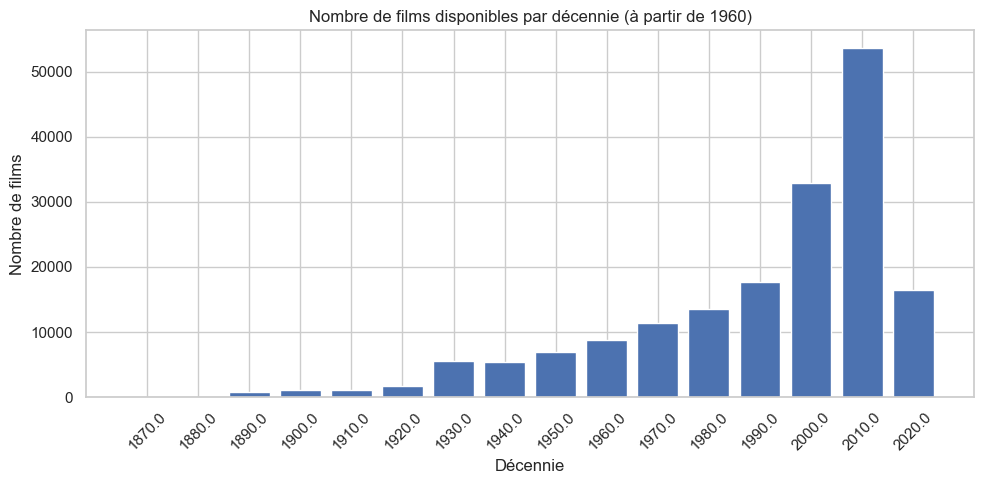

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(
    films_par_decennie['decade'].astype(str),
    films_par_decennie['nombre_de_films']
)

plt.title("Nombre de films disponibles par décennie (à partir de 1960)")
plt.xlabel("Décennie")
plt.ylabel("Nombre de films")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#

### Conclusion – Offre cinéma disponible

Le catalogue de films disponibles après 1960 est riche et varié.
Il permet de construire une programmation adaptée au public senior,
avec un large choix de films patrimoniaux et Art & Essai.

Ce constat confirme la faisabilité du projet pour les cinémas de la Creuse.
